In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [2]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


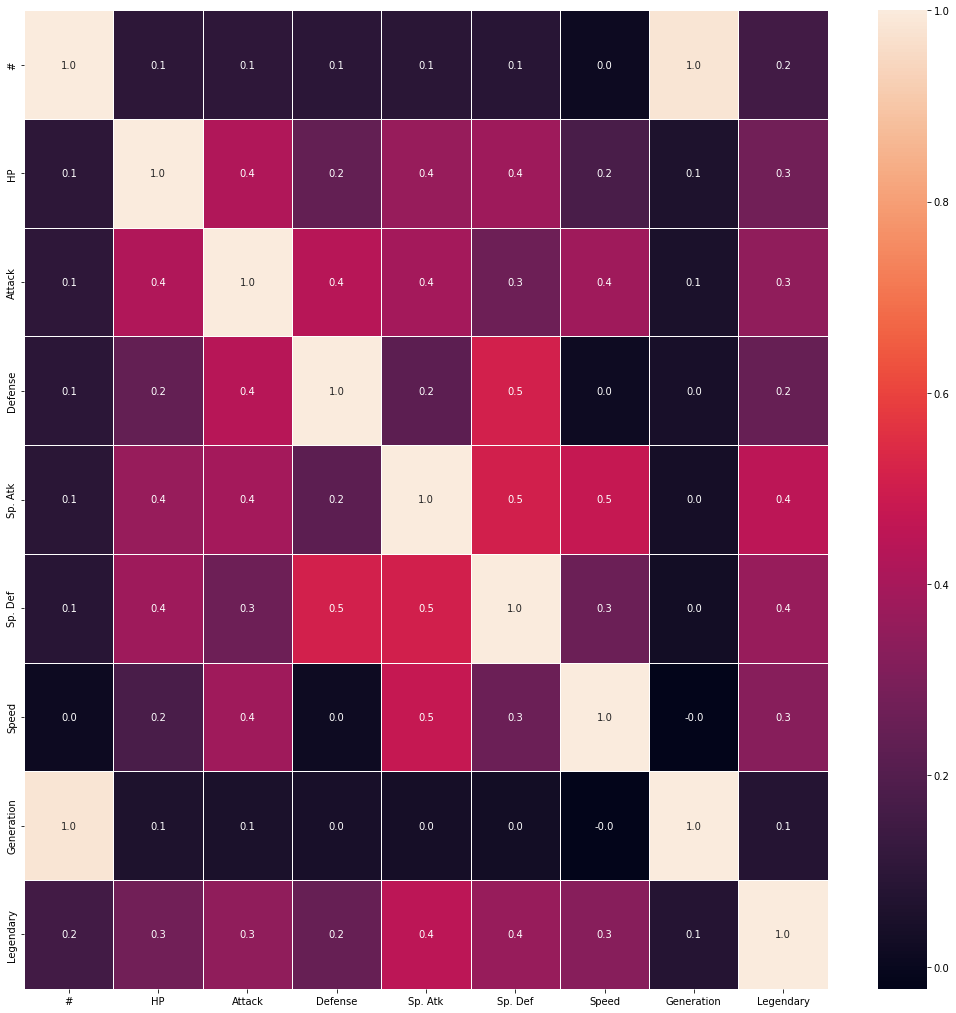

In [4]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [5]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [6]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1. Introduction to Python

**Matplotlib**

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables.
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors, labels, thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle.

Text(0.5, 1.0, 'Line Plot')

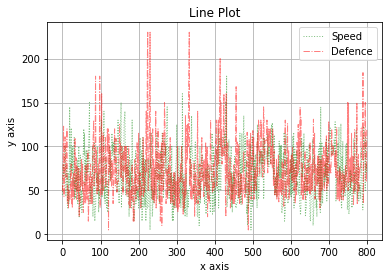

In [7]:
# Line Plot
# color = color, label = label,, linewidth = width of line, alpha = opacity, grid = grid, linestyle = style of line

data.Speed.plot(kind = 'line', color = 'g', label = 'Speed', linewidth = 1, alpha = 0.5, grid = True, linestyle = ':')
data.Defense.plot(color = 'r', label = 'Defence', linewidth = 1, alpha = 0.5, grid = True, linestyle = '-.')
plt.legend(loc='upper right') # legend = puts label into plot
plt.xlabel('x axis')  # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot') # title = title of plot

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

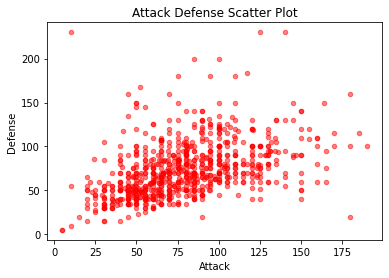

In [8]:
# Scatter Plot
# x = attack, y = defense
data.plot(kind='scatter', x = "Attack", y='Defense', alpha = 0.5, color = 'red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

<AxesSubplot:ylabel='Frequency'>

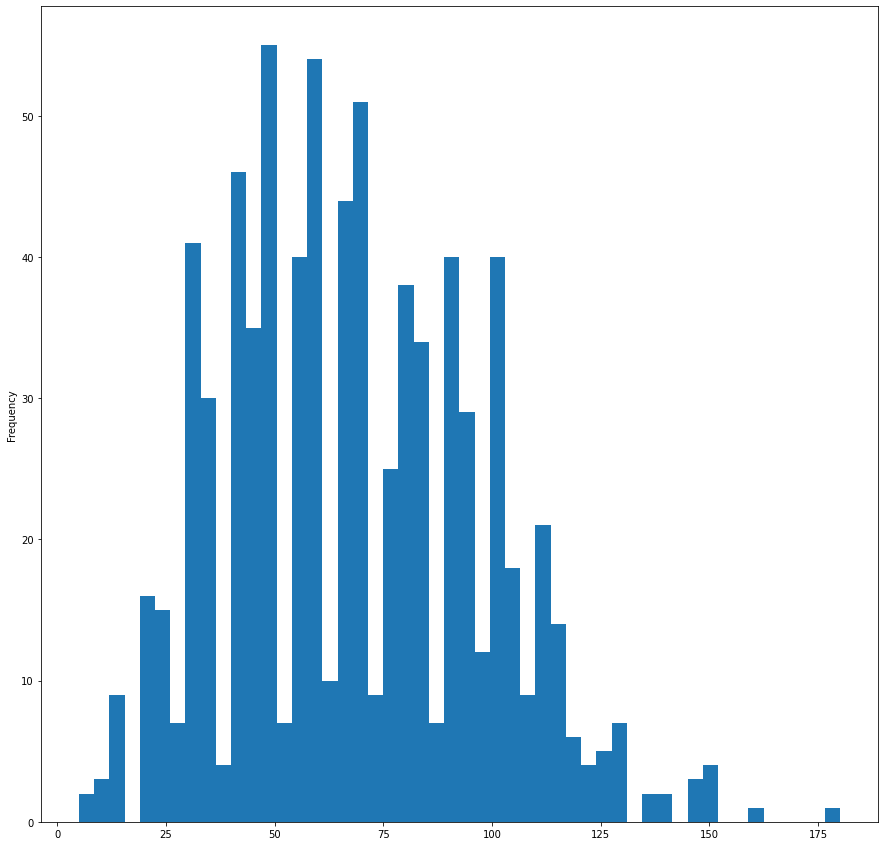

In [9]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind='hist', bins = 50, figsize = (15,15)) # how much pokemon we have on that spped

In [10]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist', bins = 50)
plt.clf()
# We cannot see the plot due to clf()

<Figure size 432x288 with 0 Axes>

***Dictionary***

* It has 'key' and 'value'.
* Faster than lists.

In [11]:
# create dictionary and look its keys and vales
dictionary = {'spain': 'madrid', 'usa': 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [12]:
# keys have to be immutable objects like string, boolean, float, integer or tuples
# list is not immutable
# keys are unique
dictionary['spain'] = "barcelona"  #update existing entry
print(dictionary)
dictionary['france'] = "paris"  #add new entry
print(dictionary)
del dictionary['spain']  #remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)
dictionary.clear()
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [13]:
# del dictionary     #removes completely
print(dictionary)

{}


***Pandas***

CSV: Comma seperated values

In [14]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [15]:
series = data['Defense']   # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]   # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


***Logic, Control Flow and Filtering***

Comparison operators: ==, <, >, <=
Boolean operators: and, or, not

In [16]:
# Comparison operator
print(3 > 2)
print(3!=2)
#Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [17]:
# filtering pands data frame
x = data['Defense']>200
data[x] # only true ones

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [18]:
# filtering pandas with logical_and
data[np.logical_and(data['Defense']>200, data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [19]:
data[(data['Defense']>200) & (data['Attack']>100)]  # another way

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


**While and For Loops**

In [20]:
i = 0
while i != 5 :
    print('i is: ',i)
    i += 1
print(i,'is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5 is equal to 5


In [21]:
lis = [1,2,3,4,5]
for i in lis:
    print('i is:',i)
print('')

#Enumerate index and value of list
# index : value = 0:1, 1:2, ...
for index, value in enumerate(lis):
    print(index,":",value)
print('')

# For dictionaries
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key,":",value)
print('')

#for pandas

for index, value in data[['Attack']][0:1].iterrows():
    print(index,":",value)

i is: 1
i is: 2
i is: 3
i is: 4
i is: 5

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5

spain : madrid
france : paris

0 : Attack    49
Name: 0, dtype: int64


# Data Science Toolbox

***User Defined Function***

* docstring: documentation for functions.
f():
"""Doctstring"""

In [22]:
def tuble_ex():
    """ return defined t tuble"""
    t = (1,2,3)
    return t
a,b,c = tuble_ex()
print(a,b,c)

1 2 3


***Scope***

* global: defined main body in script
* local: defined in a function
* build in scope: in th print, len...

In [23]:
x = 2
def f():
    x = 3
    return x
print(x)  # global scope
print(f())  # local scope

2
3


In [24]:
# What if there is no local scope
x = 5
def f():
    y = 2*x  # there is no local scope for x
    return y
print(f())  # this uses global scope x
# first local scope searched, then global scope seacrhed, if there is no x then, built in searched

10


In [25]:
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

# Nested Function

* function inside function
* There is LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [26]:
# nested function
def square():
    """return square of value"""
    def add():
        """add two local variable"""
        x=2
        y=3
        z=x+y
        return z
    return add()**2
print(square())

25


# Default and Flexible Arguments

* def f(a,b=1):    1 is default for b argument
* def f(*args):    args can be one or more
* def f(** kawargs) kwargs is a dictionary

In [27]:
# default arguments
def f(a,b=1,c=2):
    y=a+b+c
    return y
print(f(5))
print(f(5,4,3))  # defaults are changed

8
12


In [28]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)

1

1
2
3
4


In [29]:
# flexible arguments **kwargs
def f(**kwargs):
    """print key and value of dictionary"""
    for key,value in kwargs.items():
        print(key,value)
f(country='spain',capital='madrid',population=123456)

country spain
capital madrid
population 123456


# Lambda Function

In [30]:
square = lambda x: x**2
print(square(4))
tot = lambda x,y,z: x+y+z
print(tot(1,2,3))

16
6


# Anonymous Function

like lambda but more than one arguments

In [31]:
number_list = [1,2,3]
y = map(lambda x:x**2, number_list)
print(list(y))

[1, 4, 9]


# Iterators

* iterable: an object with an associated iter() method

example:list,strings and dictionaries
* iterator: produces next value with next() method

In [32]:
# iteration example
name = 'ronaldo'
it = iter(name)
print(next(it))
print(*it)

r
o n a l d o


In [33]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [34]:
un_zip = zip(*z_list)
un_list1, un_list2 = list(un_zip)   # unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list1))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


# List Comprehension

In [35]:
num1 = [1,2,3]
num2 = [i + 1 for i in num1]
print(num2)

[2, 3, 4]


[i + 1 for i in num1]: list of comprehension

i + 1: list comprehension syntax

for i in num1: for loop syntax

i: iterator

num1: iterable object

In [36]:
# Conditionals on iterable

num1 = [5, 10, 15]
num2 = [i**2 if i == 10 else i - 5 if i < 7 else i + 5 for i in num1]
print(num2)

[0, 100, 20]


In [37]:
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level", "Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


# 3.Cleaning Data

**Diagnose Data for Cleaning**

Unclean Data:

* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

In [38]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')
data.head()  # head shows first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [39]:
data.tail()  # shows last 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [40]:
# columns gives column names of features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [41]:
# shape gives number of rows and columns in a tuple
data.shape

(800, 12)

In [42]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


**Explotory Data Analysis (EDA)**

value_counts():Frequency counts

outliers:the value that is considerably higher or lower from rest of the data

* Lets say value at 75% is Q3 and value at 25% is Q1.
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1).
* (Q3-Q1) = IQR

We will use describe() method. This method includes:
* count: number of entries
* mean: average of entries
* std: standard deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

**Quantile**

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median (quantile 50%) is the number that is in the middle of the sequence. In this case it would be 11.
* The lower quantile is the median in between the smallest number and the median i.e in between 1 and 11, which is 6.
* The upper quantile, you find the median between the median and the biggest number i.e. between 11 and 17, which will be 14 according to the question above.

In [43]:
# Frequency of pokemon types
print(data['Type 1'].value_counts(dropna = False))    #if there are nan values that also be counted

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [44]:
data.describe()  #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


**Visual Exploratory Data Analysis**

* Box plots: visualize basic statistics like outliers, min/max or quantiles

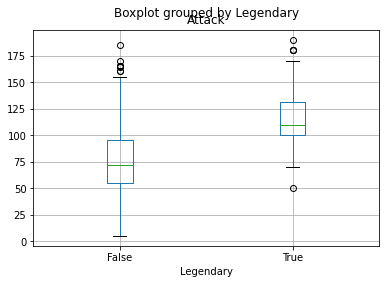

In [45]:
# Black cercles are our ouitliers
# Black line at top is max
# Blue line at top is 75%
# Green line is median 50%
# Blue line at bottom is 25%
# Black line at bottom is min
data.boxplot(column="Attack",by = 'Legendary')
plt.show()

**Tidy Data**

We tidy data with melt().

In [46]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [47]:
# id_vars = we don't wish to melt
# value_vars = we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars = ['Attack', 'Defense'])
melted
# useful with seaborn library

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


**Pivoting Data**

Reverse of melting.

In [48]:
# Index is name
melted.pivot(index = 'Name', columns = 'variable', values = 'value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


**Concatenating Data**

In [49]:
# Firstly lets create 2 dataframe
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2], axis = 0, ignore_index = True)   #axis = 0: adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [50]:
# Horizontal concatenating
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis = 1)    #axis = 1: adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


**Data Types**

In [51]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [52]:
#Converting data types

data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [53]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

**Missing Data and Testing With Assert**

If we encounter with missing data, what we can do:

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

Assert statement: check that you can turn on our turn off when you are done with your testing of the program

In [54]:
data.info()

# Type 2 has 386 null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [55]:
# Type 2 
data['Type 2'].value_counts(dropna = False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [56]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1.dropna(subset=["Type 2"], inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [57]:
# Lets check with assert statement
# Assert statement:

assert 1 == 1  # returns nothing because it is true

In [58]:
assert  data1['Type 2'].notnull().all() # returns nothing because we drop nan values

In [59]:
data1["Type 2"].fillna('empty',inplace = True)

In [60]:
assert  data['Type 2'].notnull().all() # returns nothing because we do not have nan values

In [61]:
assert data.columns[1] == 'Name'

# Pandas Foundation

**Review of Pandas**

* single column: series
* NaN: not a number
* dataframe.values: numpy

**Building Dataframes From Scratch**

* From csv
* From dictionaries

zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.

* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [62]:
# dataframes from dictionary
country = ["Spain","France"]
population = ["11", "12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [63]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [64]:
#Broadcasting
df["income"] = 0
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


**Visual Exploratory Data Analysis**

* Plot
* Subplot
* Histogram:
* bins: number of bins
* range(tuple):min and max values of bins
* normed(boolean):normalize or not
* cumulative(boolean): compute cumulative distribution

<AxesSubplot:>

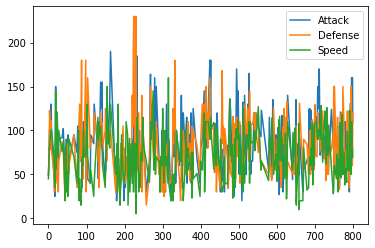

In [65]:
# Plotting all data
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# but it is confussing

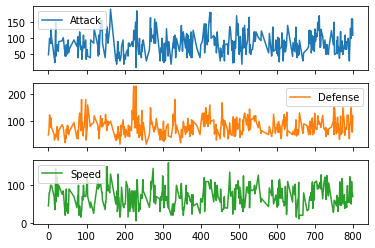

In [66]:
# subplots
data1.plot(subplots = True)
plt.show()

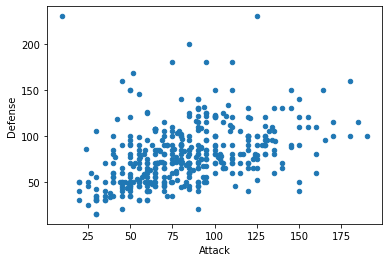

In [67]:
# scatter plot
data1.plot(kind = "scatter", x = "Attack", y = "Defense")
plt.show()

<AxesSubplot:ylabel='Frequency'>

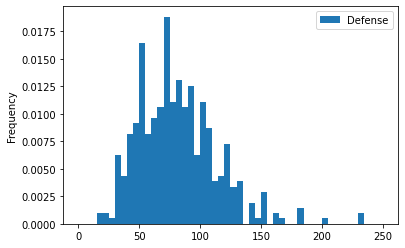

In [68]:
# hist plot
data1.plot(kind = "hist", y = "Defense", bins = 50, range = (0,250), density = True)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

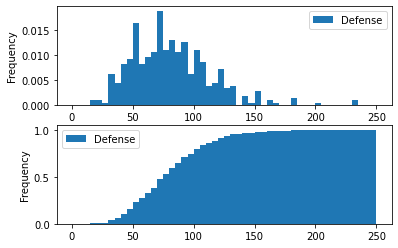

In [69]:
# histogram subplot withnon cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist", y = "Defense", bins = 50, range = (0,250), density = True, ax = axes[0])
data1.plot(kind = "hist", y = "Defense", bins = 50, range = (0,250), density = True, ax = axes[1], cumulative = True)
plt.savefig('graph.png')
plt

**Indexing Pandas Time Series**

* datetime: object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss) format

In [70]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1]))  #date is string
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [71]:
# close warnings
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it to a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2 = data2.set_index("date")
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,7,Charizard,Fire,Flying,78,84,78,109,85,100.0,1,False


In [72]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                     7
Name          Charizard
Type 1             Fire
Type 2           Flying
HP                   78
Attack               84
Defense              78
Sp. Atk             109
Sp. Def              85
Speed             100.0
Generation            1
Legendary         False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  7      Charizard   Fire  Flying  78      84       78      109   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100   80.0           1      False  
1993-03-15      120   80.0           1      False  
1993-03-16       85  100.0           1      False  


**Resampling Pandas Time Series**

* Resampling: statistical method over different time intervals. Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like 'linear', 'time', or 'index'.

In [73]:
# we will use data2 that we create at previous part
data2.resample("A").mean()  # year

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,5.5,79.000000,92.000000,100.5,115.500000,102.500000,90.000000,1.0,0.0


In [74]:
# lets ressample with month
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# In real life (data is real. Not created from us like data2) we can solve this interpolation)
# We can interpolate from first value
data2.HP.resample("M").first().interpolate("linear")

date
1992-01-31    45.0
1992-02-29    60.0
1992-03-31    80.0
1992-04-30    80.0
1992-05-31    80.0
1992-06-30    80.0
1992-07-31    80.0
1992-08-31    80.0
1992-09-30    80.0
1992-10-31    80.0
1992-11-30    80.0
1992-12-31    80.0
1993-01-31    80.0
1993-02-28    80.0
1993-03-31    80.0
Freq: M, Name: HP, dtype: float64

In [76]:
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000000,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,0.0
1992-02-29,2.000000,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.0,0.0
1992-03-31,3.000000,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.0,0.0
1992-04-30,3.208333,79.916667,82.833333,84.458333,101.291667,100.208333,80.833333,1.0,0.0
1992-05-31,3.416667,79.833333,83.666667,85.916667,102.583333,100.416667,81.666667,1.0,0.0
1992-06-30,3.625000,79.750000,84.500000,87.375000,103.875000,100.625000,82.500000,1.0,0.0
1992-07-31,3.833333,79.666667,85.333333,88.833333,105.166667,100.833333,83.333333,1.0,0.0
1992-08-31,4.041667,79.583333,86.166667,90.291667,106.458333,101.041667,84.166667,1.0,0.0
1992-09-30,4.250000,79.500000,87.000000,91.750000,107.750000,101.250000,85.000000,1.0,0.0


# Manipulating Dataframes With Pandas

**Indexing Dataframes**
* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [77]:
# read data

data = pd.read_csv("../input/pokemon-challenge/pokemon.csv")
data = data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [78]:
# indexing using square brackets
data["HP"][1]

45

In [79]:
# using column attribute and row label
data.HP[1]

45

In [80]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [81]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


**Slicing Dataframes**
* Difference between selecting columns
* Slicing and indexing series
* Reverse slicing
* From something to end

In [82]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))    #series
print(type(data[["HP"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [83]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [84]:
# Reverse Slicing
data.loc[10:1:-1,"HP":"Defense"]

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [85]:
#From something to end
data.loc[1:10,"Speed":]

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


**Filtering Dataframes**

Creating boolean series combining filters filtering column based others

In [86]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [87]:
# Combining Filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [88]:
# Filtering column based others
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

**Transforming Data**
* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns

In [89]:
# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [90]:
#or we can use lambda function
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [91]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


**Index Objects and Labeled Data**

index: sequence of label

In [92]:
# our index name:
print(data.index.name)
# changing the index name
data.index.name = "index_name"
data.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [93]:
data3 = data.copy()
data.index = range(100,900,1)
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [94]:
# We can make of the column as index.
# data = data.set_index('#')
# also ;
# data.index = data['#']

**Hierarchical Indexing**

* Setting indexing

In [95]:
data = pd.read_csv("../input/pokemon-challenge/pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [96]:
# Setting index: type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"])
data1.head(100)
# data1.loc["Fire","Flying"] # how to use indexes

#           Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                               
Grass  Poison    1      Bulbasaur   45      49       49       65       65   
       Poison    2        Ivysaur   60      62       63       80       80   
       Poison    3       Venusaur   80      82       83      100      100   
       Poison    4  Mega Venusaur   80     100      123      122      120   
Fire   NaN       5     Charmander   39      52       43       60       50   
...            ...            ...  ...     ...      ...      ...      ...   
Poison NaN      96         Grimer   80      80       50       40       50   
       NaN      97            Muk  105     105       75       65      100   
Water  NaN      98       Shellder   30      65      100       45       25   
       Ice      99       Cloyster   50      95      180       85       45   
Ghost  Poison  100         Gastly   30      35       30      100       35   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
...              ...         ...        ...  
Poison NaN        25           1      False  
       NaN        50           1      False  
Water  NaN        40           1      False  
       Ice        70           1      False  
Ghost  Poison     80           1      False  

[100 rows x 10 columns]

**Pivoting Dataframes**
* pivoting: reshape tool

In [97]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [98]:
# pivoting
df.pivot(index = "treatment", columns = "gender", values = "response")

gender,F,M
treatment,,
A,10,45
B,5,9


**Stacking and Unstacking Dataframe**
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [99]:
df1 = df.set_index(["treatment","gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [100]:
# Lets unstack it
# level deterimnes indexes
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [101]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [102]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


**Melting Dataframes**

* Reverse of pivoting

In [103]:
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


**Categoricals and Groupby**

In [104]:
df.groupby("treatment").mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [105]:
# we can only choose one of the feature
df.groupby("treatment").age.mean()

treatment
A     9.5
B    68.5
Name: age, dtype: float64

In [106]:
# or we can choose multiple features
df.groupby('treatment')[["age","response"]].mean()

,age,response
treatment,,
A,9.5,27.5
B,68.5,7.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   treatment  4 non-null      object
 1   gender     4 non-null      object
 2   response   4 non-null      int64 
 3   age        4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


In [108]:
a = [0,1,2,3,4]

for a[0] in a:

    print(a[0])

0
1
2
3
4
